# 경사하강법

## 1.  $f(x,y)=(x-2)^2+(y-2)^2+4$ 의 최소값을 경사하강법을 이용하여 구하라.

### 1.1. gradient를 구한다.

$$\frac{\partial}{\partial x}f(x, y)=2(x-2)$$ $$\frac{\partial}{\partial y}f(x, y)=2(y-2)$$

In [1]:
def get_gradient(v):
    """편미분 함수를 구한다. 즉 시점에서의 gradient"""
    return [2 * (v_i - 2) for v_i in v]

### 1.2. step을 구한다.

$$x_{t+1} = x_{t} -\rho \frac{\partial}{\partial x}f(x, y)=x_{t}-\rho \times 2(x-2)$$
$$y_{t+1} = y_{t} -\rho \frac{\partial}{\partial y}f(x, y)=y_{t}-\rho \times 2(y-2)$$

In [2]:
def step(v, gradient, step_size):
    """현재 위치에서 step_size와 gradient 이용하여 이동한다."""
    return [v_i - step_size * direction_i 
            for v_i, direction_i in zip(v, gradient)]

### 1.3. 시작점은 랜덤하게 선택해보자.

In [3]:
import numpy as np

random_generator = np.random.RandomState(42)

# 첫번째 시작점 x_0, y_0를 선택한다.
v = [random_generator.randint(-10, 10) for _ in range(2)]
v

[-4, 9]

### 4. alpha (학습률)를 설정하자.

In [4]:
alpha = 0.01

### 5. 알고리즘을 멈출 조건을 설정하자.

이전의 위치와 현재의 위치가 tolerance 보다 작으면 멈춘다. 즉 $$\text{dist}(v_t, v_{t+1}) < \text{tolerance} \text{  where  } v=(x, y)$$ 이면 멈춘다.

In [5]:
import math
def distance(v, w):
    return math.sqrt(sum([(v_i - w_i)**2 for v_i, w_i in zip(v, w)]))

In [6]:
cnt = 0  # 중간 결과값을 출력할 때 사용하기 위함
tol = 0.00001
gradients = []  # Gradient의 변화
plot_points = []  # Plotting을 위한 것

while True:
    cnt += 1
    gradient = get_gradient(v)  # 시점에서의 gradient
    next_v = step(v, gradient, alpha)
    if not cnt % 15:
        plot_points.append(next_v)
        print(next_v)  # Debugging 용
    if distance(next_v, v) < tol:
        break
    gradients.append(next_v)
    v = next_v

[-2.4314146158724235, 7.169983718517828]
[-1.2729059162946232, 5.818390235677062]
[-0.41726718564055343, 4.820145049913981]
[0.21468114384727552, 4.082871998844846]
[0.6814186544753634, 3.538344903112076]
[1.0261365588709, 3.136174014650617]
[1.2807345521861158, 2.839143022449532]
[1.4687727636442554, 2.619765109081703]
[1.6076519767439397, 2.4577393604654048]
[1.7102238725390735, 2.3380721487044145]
[1.7859803055731232, 2.249689643498023]
[1.841931666338698, 2.1844130559381862]
[1.8832556126511177, 2.136201785240363]
[1.9137762025968486, 2.1005944303036768]
[1.9363177673252754, 2.0742959381205117]
[1.952966270558973, 2.054872684347865]
[1.965262340652674, 2.040527269238547]
[1.9743438381078438, 2.029932188874182]
[1.981051151533985, 2.022106989877018]
[1.9860049659922916, 2.0163275396756597]
[1.9896637002914348, 2.0120590163266585]
[1.9923659283995712, 2.008906416867166]
[1.9943617105885405, 2.0065780043133685]
[1.9958357336489234, 2.004858310742922]
[1.9969244015379088, 2.00358819820

In [7]:
# Numpy array로 변경하면 사용이 편하다.
gradients = np.array(gradients)

x = gradients[:, 0]
y = gradients[:, 1]

In [8]:
# 등고선을 그리기 위해서는 meshgrid가 필요함
X, Y = np.meshgrid(x, y)
Z = (X-2) ** 2 + (Y-2) ** 2

In [9]:
# 최소값의 변화를 확인하기 위하여 plot
plot_points = np.array(plot_points)

px = plot_points[:, 0]
py = plot_points[:, 1]

In [10]:
import matplotlib.pyplot as plt

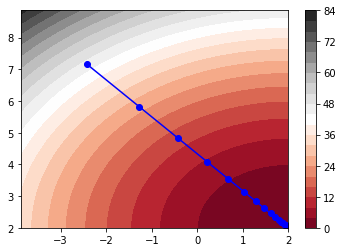

In [11]:
contours = plt.contourf(x, y, Z, 20, cmap='RdGy')
plt.plot(px, py, "b-o")
plt.colorbar();



## 2. $f(x, y) = (1-x)^2+100(y-x^2)^2$ 의 최소값을 경사하강법을 (또는 최대값을 경사상승법을) 사용하여 구하라. 해당 함수는 Rosenbrock function이다.